In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [20]:
studenq= pd.read_csv('../Questionnaire 20-21.csv', delimiter=';',decimal=',')
print(studenq.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Languages            21 non-null     int64  
 1   Writing Hand         21 non-null     object 
 2   Shoe Size            20 non-null     float64
 3   Length               21 non-null     int64  
 4   Blood Type           21 non-null     object 
 5   Resus Factor         21 non-null     object 
 6   Siblings             21 non-null     int64  
 7   Internet Purchase    21 non-null     object 
 8   Mobile Devices       20 non-null     float64
 9   Leisure              21 non-null     object 
 10  Hours Math           19 non-null     object 
 11  Importance AI Study  21 non-null     object 
 12  Antwerp Address      21 non-null     object 
 13  Travel Distance      21 non-null     float64
 14  Travel Time          21 non-null     int64  
 15  Driver License       21 non-null     objec

In [21]:
def plot_roc(y_true, y_score, title='ROC Curve', **kwargs):
    from sklearn.metrics import roc_curve, roc_auc_score
    if'pos_label' in kwargs:
        fpr, tpr, thresholds= roc_curve(y_true=y_true, y_score=y_score, pos_label=kwargs.get('pos_label'))
        auc= roc_auc_score(y_true, y_score)
    else:
        fpr, tpr, thresholds= roc_curve(y_true=y_true, y_score=y_score)
        auc= roc_auc_score(y_true, y_score)
    
    # calculate optimal cut-off with Youden index method 
    optimal_idx= np.argmax(tpr-fpr)
    optimal_threshold= thresholds[optimal_idx]

    figsize= kwargs.get('figsize', (7, 7))
    fig, ax= plt.subplots(1, 1, figsize=figsize)
    ax.grid(linestyle='--')
    
    # plot ROC curve
    ax.plot(fpr, tpr, color='darkorange', label='AUC: {}'.format(auc))
    ax.set_title(title)
    ax.set_xlabel('FalsePositiveRate(FPR)')
    ax.set_ylabel('True PositiveRate(TPR)')
    ax.fill_between(fpr, tpr, alpha=0.3, color='darkorange', edgecolor='black')
    
    # plot classifier
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    
    # plot optimal cut-off
    ax.scatter(fpr[optimal_idx], tpr[optimal_idx],label='optimalcutoff {:.2f} op ({:.2f},{:.2f})'.format(optimal_threshold, fpr[optimal_idx],tpr[optimal_idx]), color='red')
    ax.plot([fpr[optimal_idx], fpr[optimal_idx]], [0, tpr[optimal_idx]], linestyle='--', color='red')
    ax.plot([0, fpr[optimal_idx]], [tpr[optimal_idx], tpr[optimal_idx]], linestyle='--', color='red')
    ax.legend(loc='lower right')
    
    plt.show()

In [22]:
# 1.A Can you predict if a new student is a smoker based on the 
# indicated length (173), shoe size (40), travel distance (5) and
# travel time (10) of this student?

def discriminentAnalysis(subset):
    # Remember to delete NA values from the subset
    subset.dropna(inplace=True)

    # Change these to the columns you have data for
    x = subset[['Length', 'Shoe Size', 'Travel Distance', 'Travel Time']]
    # Change this to the column you need the answer for
    y = subset['Smoker']

    lda = LinearDiscriminantAnalysis()
    lda.fit(x, y)

    # Insert the values of your stuff here
    predictedValue = lda.predict([[173, 40, 5, 10]])
    return print(predictedValue)

subset = studenq[['Length','Shoe Size', 'Travel Distance', 'Travel Time','Smoker']].copy()
subset.dropna(inplace=True)
subset = subset.reset_index() # ifnotimpact on evaluationmetrics
x = subset[['Length','Shoe Size', 'Travel Distance', 'Travel Time']]
y = subset['Smoker']
lda= LinearDiscriminantAnalysis()
lda.fit(x,y)
lda.predict([[173,40,5,10]])

# discriminentAnalysis(subset=subset)


['No']


In [31]:
# 1.B What is the accuracy of the discriminant analysis in which 
# length and shoe size predict the writing hand?

def confMatrix(subset):
    # Remember to delete NA values from the subset
    subset.dropna(inplace=True)

    # Change these to the columns you have data for
    x = subset[['Length', 'Shoe Size', 'Travel Distance', 'Travel Time']]
    # Change this to the column you need the answer for
    y = subset['Smoker']

    lda = LinearDiscriminantAnalysis()
    lda.fit(x, y)

    predicted = pd.Series(lda.predict(x), name='predicted')
    actual = subset['Smoker'].rename('actual')
    return pd.crosstab(index=actual, columns=predicted,margins='all',margins_name='total')

# accuracy(pd.crosstab(index=actual, columns=predicted))

# confMatrix(subset)

predicted = pd.Series(lda.predict(x), name='predicted')
actual = subset['Smoker'].rename('actual')
pd.crosstab(index=actual, columns=predicted, margins='all', margins_name='total')


predicted  No  Yes  total
actual                   
No         14    1     15
Yes         2    2      4
total      16    3     19

In [29]:
# 1.C Calculate the usual evaluation metrics for a binary classification

confusion_matrix = pd.crosstab(index=actual, columns=predicted)
# overviewmetrics(confusion_matrix,1)
# positiverates(confusion_matrix)

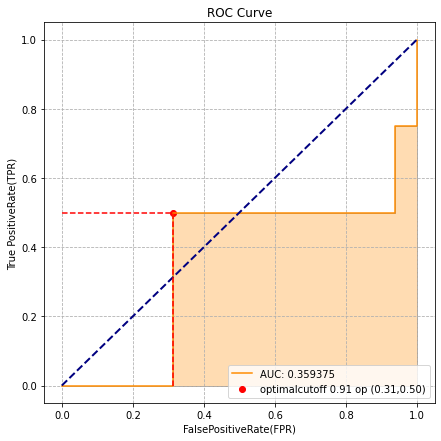

In [30]:
# 1.D Draw the ROC-curve

y_score = lda.predict_proba(x)[:,0]
plot_roc(actual, y_score, pos_label='Yes') # home made function

In [ ]:
# 2 What is the accuracy of the discriminant analysis in which length and shoe size predict the writing hand?

subset2 = studenq[['Length','Shoe Size', 'Writing Hand']].copy()
subset2.dropna(inplace=True)
subset2 = subset2.reset_index() # if not impact on evaluationmetrics
X2 = subset2[['Length','Shoe Size']]
y2 = subset2['Writing Hand']
lda= LinearDiscriminantAnalysis()
lda.fit(X2,y2)
predicted2 = pd.Series(lda.predict(X2), name='predicted')
actual= subset2['Writing Hand'].rename('actual')
pd.crosstab(index=actual, columns=predicted,margins='all', margins_name='total')
# accuracy(pd.crosstab(index=actual, columns=predicted))  # home made function

C:\Users\Ruben\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:480: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = (S**2 / np.sum(


predicted  No  Yes  total
actual                   
Right      17    3     20
total      17    3     20